# Hello Pandas [<img src="http://mybinder.org/badge.svg" align="right">](http://mybinder.org/repo/matr01/jupyter-hello?filepath=hello-pandas.ipynb)

inspired by https://gitlab.com/jan.kolomaznik/pydata

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Získání seznamu měst v Česku podle počtu obyvatel

z wikipedia do DataFrame

\+ úprava formátovaných čísel a převod zpět na číslo

In [2]:
mesta = (pd.read_html("https://cs.wikipedia.org/wiki/Seznam_m%C4%9Bst_v_%C4%8Cesku_podle_po%C4%8Dtu_obyvatel")
         [0] # Data jsou v prvni tabulce
         .drop(columns=["Obrázek", "#"])
         .set_index("Článek"))
mesta['Počet obyvatel'] = mesta['Počet obyvatel'].str.replace(r"\s", "").astype(int)
mesta

,Počet obyvatel,Rozloha (km2),Okres
Článek,,,
Praha,1324277,49621,Praha
Brno,381346,23018,okres Brno-město
Ostrava,287968,21423,okres Ostrava-město
Plzeň,174842,13767,okres Plzeň-město
Liberec,104802,10609,okres Liberec
...,...,...,...
Janov,284,1103,okres Bruntál
Boží Dar,250,3791,okres Karlovy Vary
Rejštejn,247,3043,okres Klatovy


### Vykreslení počtu obyvatel měst

v logaritmické stupnici

<AxesSubplot:xlabel='Článek'>

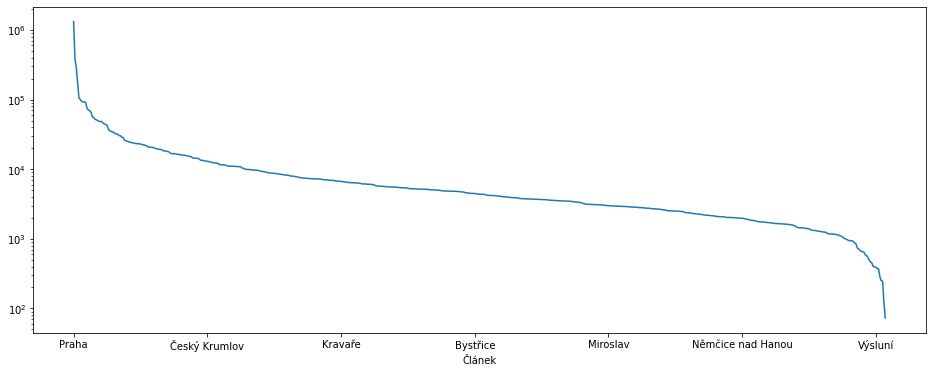

In [52]:
mesta['Počet obyvatel'].plot(figsize=(16,6),logy=True)

### Vykreslení histogramu velikosti měst

počet měst s počtem obyvatel v rozmezí od-do

s logaritmickými skupinami, v logaritmických stupnicích

<AxesSubplot:ylabel='Frequency'>

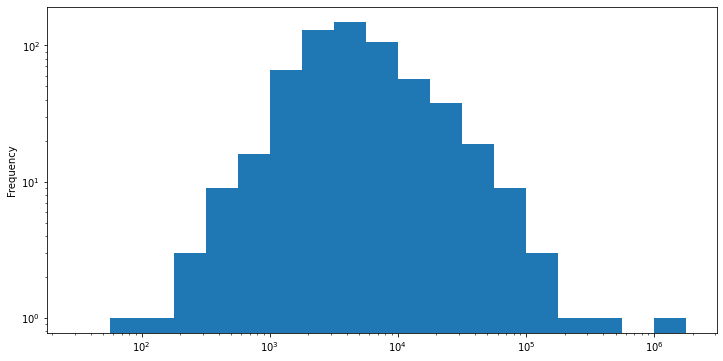

In [48]:
mesta['Počet obyvatel'].plot.hist(
    figsize=(12,6),bins=10**(np.arange(1.5,6.5,0.25)),logy=True,logx=True)

<AxesSubplot:xlabel='Počet obyvatel', ylabel='Rozloha (km2)'>

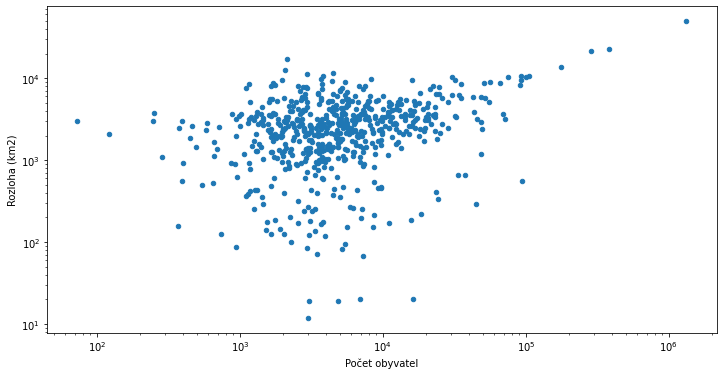

In [57]:
mesta.plot.scatter(x="Počet obyvatel",y="Rozloha (km2)",logy=True,logx=True,figsize=(12,6))

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

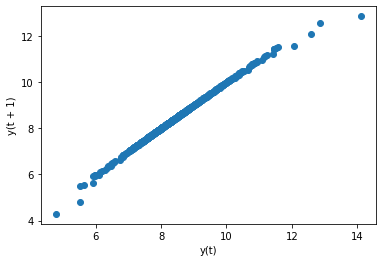

In [3]:
from pandas.plotting import lag_plot

lag_plot(np.log(mesta['Počet obyvatel']))

In [4]:
mesta.corr()

,Počet obyvatel,Rozloha (km2)
Počet obyvatel,1.000000,0.712348
Rozloha (km2),0.712348,1.000000


### Blood pressure monitor data

In [14]:
samples = pd.read_csv("data/sensor_data_pressure.csv")
samples.sample(10)

,time,pulse,sys,dias
25,2020-09-08 13:09:48.000000,83.0,129.0,84.0
59,2020-09-09 11:45:55.000000,77.0,104.0,70.0
14,2020-09-07 15:26:28.000000,65.0,122.0,91.0
30,2020-09-08 13:09:48.000000,83.0,129.0,84.0
47,2020-09-08 16:15:27.000000,76.0,137.0,91.0
35,2020-09-08 13:09:48.000000,83.0,129.0,84.0
11,2020-09-07 15:20:13.000000,79.0,117.0,76.0
23,2020-09-08 13:04:08.000000,70.0,122.0,81.0
46,2020-09-08 16:02:26.000000,69.0,143.0,96.0
18,2020-09-07 23:43:31.000000,83.0,112.0,69.0


In [10]:
# filter out outliers
samples[samples["pulse"] < 150].corr()

,pulse,sys,dias
pulse,1.000000,-0.329190,-0.339309
sys,-0.329190,1.000000,0.827567
dias,-0.339309,0.827567,1.000000


<AxesSubplot:>

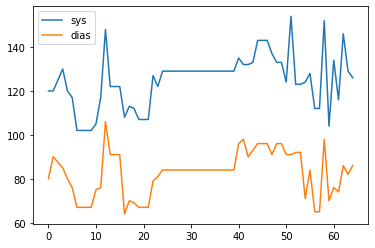

In [17]:
samples[samples["pulse"] < 150][["sys","dias"]].plot()